In [9]:
import os
import torch
import torch.nn as nn
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision.datasets.folder import default_loader
from torchvision import transforms
import numpy as np
import random
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import time
import copy
from tqdm import tqdm
import os
import imageio
from skimage import img_as_float
# from bm3d import bm3d
import cv2


In [7]:
def load_images_from_folder(path=None, img_width=224, img_height=224):
    try:
        images = []
        for filename in os.listdir(path):
            file_path = os.path.join(path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                img = cv2.resize(img, (img_width, img_height))
                images.append(img)

        return np.array(images)
    except Exception as e:
        print(f"Error has occurred during data loading: {e}")

In [5]:
# Path to the directory containing your dataset
train_n_dir = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/original_data/train/NORMAL"
train_p_dir = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/original_data/train/PNEUMONIA"
val_n_dir = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/original_data/val/NORMAL"
val_p_dir ="/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/original_data/val/PNEUMONIA"
test_n_dir = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/original_data/test/NORMAL"
test_p_dir = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/original_data/test/PNEUMONIA"

In [10]:
train_n_img = load_images_from_folder(train_n_dir)
train_p_img = load_images_from_folder(train_p_dir)

val_n_img = load_images_from_folder(val_n_dir)
val_p_img = load_images_from_folder(val_p_dir)

test_n_img = load_images_from_folder(test_n_dir)
test_p_img = load_images_from_folder(test_p_dir)

In [10]:
# List all files in the dataset directory
train_n_files = [f for f in os.listdir(train_n_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
train_p_files = [f for f in os.listdir(train_p_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

val_n_files = [f for f in os.listdir(val_n_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
val_p_files = [f for f in os.listdir(val_p_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

test_n_files = [f for f in os.listdir(test_n_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]
test_p_files = [f for f in os.listdir(test_p_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

In [11]:
# Create a directory to save denoised images
output_train_n_dir = "./denoising-pneumonia/bm3d_dataset/train/NORMAL"
os.makedirs(output_train_n_dir, exist_ok=True)
output_train_p_dir = "./denoising-pneumonia/bm3d_dataset/train/PNEUMONIA"
os.makedirs(output_train_p_dir, exist_ok=True)

output_val_n_dir = "./denoising-pneumonia/bm3d_dataset/val/NORMAL"
os.makedirs(output_val_n_dir, exist_ok=True)
output_val_p_dir = "./denoising-pneumonia/bm3d_dataset/val/PNEUMONIA"
os.makedirs(output_val_p_dir, exist_ok=True)

output_test_n_dir = "./denoising-pneumonia/bm3d_dataset/test/NORMAL"
os.makedirs(output_test_n_dir, exist_ok=True)
output_test_p_dir = "./denoising-pneumonia/bm3d_dataset/test/PNEUMONIA"
os.makedirs(output_test_p_dir, exist_ok=True)

In [12]:
# Specify the noise standard deviation (sigma)
sigma = 0.1

#  Loop through each image in TRAIN NORMAL
for image_file in train_n_files:
    # Load the noisy image
    image_path = os.path.join(train_n_dir, image_file)
    noisy_image = imageio.imread(image_path)

    # Convert the image to floating-point representation
    noisy_image_float = img_as_float(noisy_image)

    # Apply BM3D denoising
    denoised_image = bm3d(noisy_image_float, sigma)

    # Save the denoised image
    output_path = os.path.join(output_train_n_dir, f"denoised_{image_file}")
    imageio.imwrite(output_path, (denoised_image * 255).astype('uint8'))

'\n# Loop through each image in the dataset\nfor image_file in train_n_files:\n    # Load the noisy image\n    image_path = os.path.join(train_n_dir, image_file)\n    noisy_image = imageio.imread(image_path)\n\n    # Convert the image to floating-point representation\n    noisy_image_float = img_as_float(noisy_image)\n\n    # Transfer the noisy image to the GPU\n    noisy_image_gpu = cp.asarray(noisy_image_float)\n\n    # Apply BM3D denoising using GPU acceleration with cupy\n    denoised_image_gpu = bm3d(noisy_image_gpu, sigma)\n\n    # Transfer the denoised image back to the CPU\n    denoised_image = cp.asnumpy(denoised_image_gpu)\n\n    # Save the denoised image\n    output_path = os.path.join(output_train_n_dir, f"denoised_{image_file}")\n    imageio.imwrite(output_path, (denoised_image * 255).astype(\'uint8\'))\n\n'

In [13]:
#  Loop through each image in TRAIN PNEUMONIA
for image_file in train_p_files:
    # Load the noisy image
    image_path = os.path.join(train_p_dir, image_file)
    noisy_image = imageio.imread(image_path)

    # Convert the image to floating-point representation
    noisy_image_float = img_as_float(noisy_image)

    # Apply BM3D denoising
    denoised_image = bm3d(noisy_image_float, sigma)

    # Save the denoised image
    output_path = os.path.join(output_train_p_dir, f"denoised_{image_file}")
    imageio.imwrite(output_path, (denoised_image * 255).astype('uint8'))

'\n\n#  Loop through each image in TRAIN PNEUMONIA\nfor image_file in train_p_files:\n    # Load the noisy image\n    image_path = os.path.join(train_p_dir, image_file)\n    noisy_image = imageio.imread(image_path)\n\n    # Convert the image to floating-point representation\n    noisy_image_float = img_as_float(noisy_image)\n\n    # Apply BM3D denoising\n    denoised_image = bm3d(noisy_image_float, sigma)\n\n    # Save the denoised image\n    output_path = os.path.join(output_train_p_dir, f"denoised_{image_file}")\n    imageio.imwrite(output_path, (denoised_image * 255).astype(\'uint8\'))\n\n'

In [14]:
# Loop through each image in VAL NORMAL
for image_file in val_n_files:
    # Load the noisy image
    image_path = os.path.join(val_n_dir, image_file)
    noisy_image = imageio.imread(image_path)

    # Convert the image to floating-point representation
    noisy_image_float = img_as_float(noisy_image)

    # Apply BM3D denoising
    denoised_image = bm3d(noisy_image_float, sigma)

    # Save the denoised image
    output_path = os.path.join(output_val_n_dir, f"denoised_{image_file}")
    imageio.imwrite(output_path, (denoised_image * 255).astype('uint8'))

/tmp/ipykernel_1369922/529939286.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  noisy_image = imageio.imread(image_path)


In [15]:
# Loop through each image in VAL PNEUMONIA
for image_file in val_p_files:
    # Load the noisy image
    image_path = os.path.join(val_p_dir, image_file)
    noisy_image = imageio.imread(image_path)

    # Convert the image to floating-point representation
    noisy_image_float = img_as_float(noisy_image)

    # Apply BM3D denoising
    denoised_image = bm3d(noisy_image_float, sigma)

    # Save the denoised image
    output_path = os.path.join(output_val_p_dir, f"denoised_{image_file}")
    imageio.imwrite(output_path, (denoised_image * 255).astype('uint8'))

/tmp/ipykernel_1369922/1685601100.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  noisy_image = imageio.imread(image_path)


In [16]:
# Loop through each image in TEST NORMAL
for image_file in test_n_files:
    # Load the noisy image
    image_path = os.path.join(test_n_dir, image_file)
    noisy_image = imageio.imread(image_path)

    # Convert the image to floating-point representation
    noisy_image_float = img_as_float(noisy_image)

    # Apply BM3D denoising
    denoised_image = bm3d(noisy_image_float, sigma)

    # Save the denoised image
    output_path = os.path.join(output_test_n_dir, f"denoised_{image_file}")
    imageio.imwrite(output_path, (denoised_image * 255).astype('uint8'))

/tmp/ipykernel_1369922/1669538953.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  noisy_image = imageio.imread(image_path)


In [17]:
# Loop through each image in TEST PNEUMONIA
for image_file in test_p_files:
    # Load the noisy image
    image_path = os.path.join(test_p_dir, image_file)
    noisy_image = imageio.imread(image_path)

    # Convert the image to floating-point representation
    noisy_image_float = img_as_float(noisy_image)

    # Apply BM3D denoising
    denoised_image = bm3d(noisy_image_float, sigma)

    # Save the denoised image
    output_path = os.path.join(output_test_p_dir, f"denoised_{image_file}")
    imageio.imwrite(output_path, (denoised_image * 255).astype('uint8'))

/tmp/ipykernel_1369922/1227690207.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  noisy_image = imageio.imread(image_path)


/tmp/ipykernel_1800620/3646285807.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("/home/branislava.jankovic/Desktop/denoising-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg")


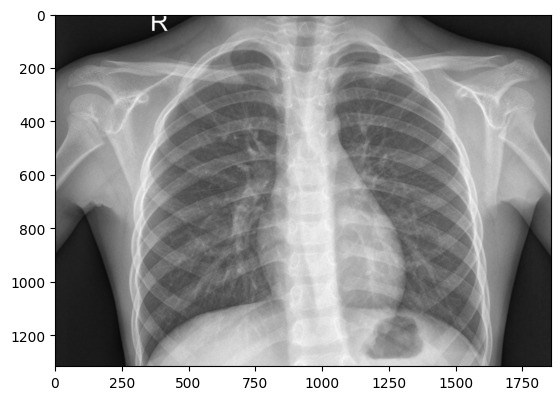

In [3]:
# original image
img = imageio.imread("./denoising-pneumonia/chest_xray/test/NORMAL/IM-0001-0001.jpeg")
plt.imshow(img, plt.cm.gray)

/tmp/ipykernel_1800620/125436337.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("/home/branislava.jankovic/Desktop/denoising-pneumonia/bm3d_dataset/test/NORMAL/denoised_IM-0001-0001.jpeg")


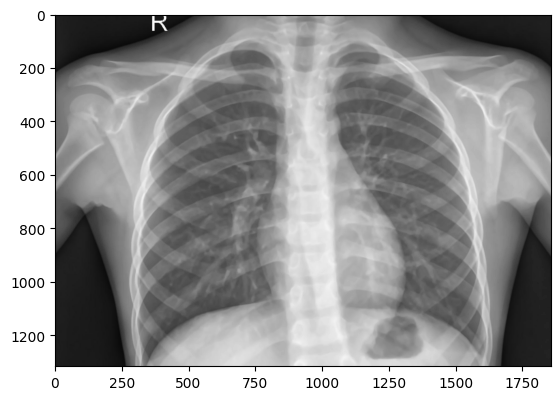

In [4]:
# denoised image
img = imageio.imread("./denoising-pneumonia/bm3d_dataset/test/NORMAL/denoised_IM-0001-0001.jpeg")
plt.imshow(img, plt.cm.gray)

______________________________________________________________________Denoising evaluation ______________________________________________________________________

SSIM is a measure of similarity between two images (1: perfect similarity, 0 no similarity, -1 perfect anti correlation)

In [14]:
def read_dataset(path=None, img_width=64, img_height=64):
    try:
        images = []
        for filename in os.listdir(path):
            file_path = os.path.join(path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                img = cv2.resize(img, (img_width, img_height))
                images.append(img)

        return np.array(images)
    except Exception as e:
        print(f"Error has occurred during data loading: {e}")

In [12]:
d_train_dir0 = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/denoised_data/bm3d_dataset/train/NORMAL"
d_train_dir1 = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/denoised_data/bm3d_dataset/train/PNEUMONIA"

d_val_dir0 = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/denoised_data/bm3d_dataset/val/NORMAL"
d_val_dir1 = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/denoised_data/bm3d_dataset/val/PNEUMONIA"

d_test_dir0 = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/denoised_data/bm3d_dataset/test/NORMAL"
d_test_dir1 = "/home/khalil.alblooshi/labs/AI701/Project 5/denoising-pneumonia/denoised_data/bm3d_dataset/test/PNEUMONIA"

In [20]:
dd_train_input0 = read_dataset(d_train_dir0, img_height=224, img_width=224)
dd_train_input1 = read_dataset(d_train_dir1, img_height=224, img_width=224)

dd_val_input0 = read_dataset(d_val_dir0, img_height=224, img_width=224)
dd_val_input1 = read_dataset(d_val_dir1, img_height=224, img_width=224)

dd_test_input0 = read_dataset(d_test_dir0, img_height=224, img_width=224)
dd_test_input1 = read_dataset(d_test_dir1, img_height=224, img_width=224)

In [4]:
from skimage.metrics import structural_similarity as ssim

def calculate_average_ssim(noisy_images, denoised_images):
    if len(noisy_images) != len(denoised_images):
        raise ValueError("The number of noisy and denoised images must be the same")

    total_ssim = 0.0
    for noisy, denoised in zip(noisy_images, denoised_images):
        # Ensure the images have the same shape
        if noisy.shape != denoised.shape:
            # Resize or adjust as necessary
            denoised = resize_image_to_match(denoised, noisy.shape[:2])

        ssim_value = ssim(noisy, denoised, multichannel=True)
        total_ssim += ssim_value

    average_ssim = total_ssim / len(noisy_images)
    return average_ssim

In [21]:
average_ssim_train_n = calculate_average_ssim(train_n_img, dd_train_input0)
average_ssim_train_p = calculate_average_ssim(train_p_img, dd_train_input1)

average_ssim_val_n = calculate_average_ssim(val_n_img, dd_val_input0)
average_ssim_val_p = calculate_average_ssim(val_p_img, dd_dval_input1)

average_ssim_test_n = calculate_average_ssim(test_n_img, dd_test_input0)
average_ssim_test_p = calculate_average_ssim(test_p_img, dd_test_input1)

print("Average SSIM Train Normal:", average_ssim_train_n)
print("Average SSIM Train Pneumonia:", average_ssim_train_p)

print("Average SSIM val Normal:", average_ssim_val_n)
print("Average SSIM val Pneumonia:", average_ssim_val_p)

print("Average SSIM test Normal:", average_ssim_test_n)
print("Average SSIM test Pneumonia:", average_ssim_test_p)

/tmp/ipykernel_4108314/2828832202.py:14: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_value = ssim(noisy, denoised, multichannel=True)


Average SSIM Train Normal: 0.3625076517824085
Average SSIM Train Pneumonia: 0.47363941912423213
Average SSIM val Normal: 0.5407835778161405
Average SSIM val Pneumonia: 0.4977144478896595
Average SSIM test Normal: 0.38219791635960276
Average SSIM test Pneumonia: 0.48249767391547976


The PSNR (Peack Signal to Noise Ratio) is another effective method usually used to measure the change between the original image and its compressed version. It is also useful to use in measuring the effectiveness of reconstructting noisy images to reduce its noise.

$$\text{PSNR} = 10 \cdot \log_{10} \left( \frac{\text{MAX}^2}{\text{MSE}} \right)$$


In [22]:
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def calculate_average_psnr(noisy_images, denoised_images):
    total_psnr = 0.0
    for noisy, denoised in zip(noisy_images, denoised_images):
        if noisy.shape != denoised.shape:
            denoised = resize_image_to_match(denoised, noisy.shape[:2])

        psnr_value = calculate_psnr(noisy, denoised)
        total_psnr += psnr_value

    average_psnr = total_psnr / len(noisy_images)
    return average_psnr


In [24]:
one_image = calculate_psnr(train_n_img[0], dd_train_input0[0])

average_psnr_train_n = calculate_average_psnr(train_n_img, dd_train_input0)
average_psnr_train_p = calculate_average_psnr(train_p_img, dd_train_input1)
average_psnr_val_n = calculate_average_psnr(val_n_img, dd_val_input0)
average_psnr_val_p = calculate_average_psnr(val_p_img, dd_val_input1)
average_psnr_test_n = calculate_average_psnr(test_n_img, dd_test_input0)
average_psnr_test_p = calculate_average_psnr(test_p_img, dd_test_input1)

In [25]:
print("Average PSNR Values:")
print()
print(f"  - The first noisy image and its denoised version: {one_image:.2f} dB")
print()
print(f"  - Train Normal: {average_psnr_train_n:.2f} dB")
print(f"  - Train Pneumonia: {average_psnr_train_p:.2f} dB")
print(f"  - Validation Normal: {average_psnr_val_n:.2f} dB")
print(f"  - Validation Pneumonia: {average_psnr_val_p:.2f} dB")
print(f"  - Test Normal: {average_psnr_test_n:.2f} dB")
print(f"  - Test Pneumonia: {average_psnr_test_p:.2f} dB")

Average PSNR Values:

  - The first noisy image and its denoised version: 28.09 dB

  - Train Normal: 28.26 dB
  - Train Pneumonia: 28.08 dB
  - Validation Normal: 30.97 dB
  - Validation Pneumonia: 28.21 dB
  - Test Normal: 28.18 dB
  - Test Pneumonia: 28.27 dB


 A higher PSNR indicates that the reconstruction or denoising process has preserved more of the original image's details. So the noise level is lower in comparison to the signal strength.

The interpretation of PSNR values can be subjective and depends on the context and the specific application. For example, in some applications, a PSNR of 30 dB might be considered good quality, while in others, a higher PSNR might be required.

For images, a PSNR value of:

    Below 20 dB is considered poor quality.
    Between 20 dB and 30 dB is acceptable to good.
    Above 30 dB is generally considered high quality.
    Above 40 dB is often indistinguishable from the original image.

Usage in Denoising: In image denoising, a higher PSNR value usually indicates that the denoising algorithm has effectively reduced noise while preserving important image details.